# E-Learning Company Analysis:
Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets (location) to advertise our product in.
To achieve that, we have to conduct surverys on several markets to know students' experience and opinion on e-learning courses. Also, we can try to look for existing data that could help us in achieving our goal. One of the options would be freeCodeCamp's 2017 New Coder Survey. freeCodeCamp's survey could be relevent for our analysis since it also provides courses on web development like our company.
Note that our monthly subscription price is $59.

Reminder: our goal in this project is to find out the two best markets (location) to advertise our product in.

(c) Miradiz Rakhmatov

## Data Exploration:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 150

In [2]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [3]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Before we continue, lets make sure this survey is the right data to make our analysis: 
As mentioned earlier, we mostly offer courses related in web and mobile development. Since we are using a third party survey (not conducted for us), we want to make sure this survey sample serves as a representative for our population of interest and it has the right categories of people for our purpose. Let's see how many students are into Web Development.

In [4]:
## Create a DataFrame from frequency distribution table of JobRoleInterest column
indexes = list(survey['JobRoleInterest'].value_counts().head(10).index)
percentages = list((survey['JobRoleInterest'].value_counts(normalize=True, dropna=False)*100).head(10))
actual = list(survey['JobRoleInterest'].value_counts().head(10))

rep = pd.DataFrame({'Percentage': percentages, 'Number of Students': actual}, index=indexes)
rep

,Percentage,Number of Students
Full-Stack Web Developer,61.529574,823
Front-End Web Developer,4.528198,450
Data Scientist,2.475928,152
Back-End Web Developer,0.836314,142
Mobile Developer,0.781293,117
Game Developer,0.643741,114
Information Security,0.627235,92
"Full-Stack Web Developer, Front-End Web Developer",0.506190,64
"Front-End Web Developer, Full-Stack Web Developer",0.352132,56
Product Manager,0.308116,55


#### As you can see above, the survey has quite enough students interested in the courses that we provide. We can conclude that this sample data is representative of our population.

## Questions to takle to achieve our goal:

For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

1. What are the locations with the greatest number of new coders.
2. How much money new coders are willing to spend on learning. 
3. How much money on average do new coders spend per month by location. Note that we charge 59 dollars for our subscription which means that we need want to market in the location that is willing to pay at least 59 dollars per month.

In [5]:
## Initial shape of the dataset
survey.shape

(18175, 136)

In [6]:
## NaN values in JobRoleInterest column
survey['JobRoleInterest'].isnull().sum()

11183

In [7]:
## Let's drop the rows that have NaN values in JobRoleInterest column
survey.drop(survey[survey['JobRoleInterest'].isnull()].index, inplace=True)

In [8]:
## Shape of the dataset after dropping NaN values in JobRoleInterest column
survey.shape

(6992, 136)

#### 1. Let's find the locations with the highest number of students

In [9]:
## Students by location
survey['CountryLive'].value_counts().head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [10]:
## Lets isolate the dataset with only 4 countries that have the highest amount of students 
us = survey['CountryLive'] == 'United States of America'
india = survey['CountryLive'] == 'India'
uk = survey['CountryLive'] == 'United Kingdom'
canada = survey['CountryLive'] == 'Canada'

## From now on 'top4' is going to be our dataset to work with
top4 = survey[us|india|uk|canada].copy()
top4.shape

(4228, 136)

In [11]:
## Number of students by country
top4['CountryLive'].value_counts()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Name: CountryLive, dtype: int64

In [12]:
## Second way to do the same as above (just for my own notes)

# top4markets = ['United States of America','India','United Kingdom','Canada']
# def func(x):
#     if x in top4markets:
#         return True
#     return False
# survey['top4markets'] = survey['CountryLive'].map(func)
# survey[survey['top4markets'] == True].shape

#### 2. Let's find how much new coders are willing to spend per month:
I'm going to divide total amount of money spent by number of months spent programming to find monthly expenditure for leaning.  

In [13]:
## As you can see there are students that have been studying 0 month which means they just started learning
top4['MonthsProgramming'].value_counts().sort_index().head()

0.0    150
1.0    480
2.0    401
3.0    380
4.0    209
Name: MonthsProgramming, dtype: int64

In [14]:
## Check the datatype of each value in the column
top4['MonthsProgramming'].map(lambda x: type(x)).value_counts()

<class 'float'>    4228
Name: MonthsProgramming, dtype: int64

In [15]:
## Let's change 0 month to 1 month 
## This way I will avoid dividing the values by 0
top4.loc[top4['MonthsProgramming'] == 0.0, 'MonthsProgramming'] = 1.0

In [16]:
## After transformation
top4['MonthsProgramming'].value_counts().sort_index().head()

1.0    630
2.0    401
3.0    380
4.0    209
5.0    156
Name: MonthsProgramming, dtype: int64

In [17]:
## Let's find monthly expenditure
top4['SpentPerMonth'] = top4['MoneyForLearning'] / top4['MonthsProgramming']
top4['SpentPerMonth'].value_counts(dropna=False)

0.000000       1844
NaN             313
16.666667        82
50.000000        76
25.000000        74
               ... 
1.052632          1
4.857143          1
1670.000000       1
0.672043          1
611.111111        1
Name: SpentPerMonth, Length: 388, dtype: int64

In [18]:
## Number of NaN values in the column
top4['SpentPerMonth'].isnull().sum()

313

In [19]:
## Let's drop those NaN values 
top4.drop(top4[top4['SpentPerMonth'].isnull()].index, inplace=True)

In [20]:
## Let's make sure we don't have any NaN values in any of following columns : CountryLive and SpentPerMonth.
top4[['CountryLive', 'SpentPerMonth']].isnull().sum()

CountryLive      0
SpentPerMonth    0
dtype: int64

#### 3. Let's find how much money on avarage students spend per month by location

In [21]:
top4.groupby('CountryLive')['SpentPerMonth'].mean().sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: SpentPerMonth, dtype: float64

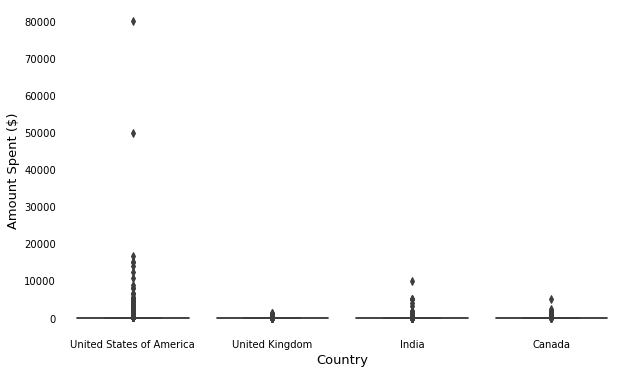

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='CountryLive', y='SpentPerMonth', data=top4)
for location in ['left', 'right', 'top', 'bottom']:
     ax.spines[location].set_visible(False)
ax.tick_params(bottom=False, left=False)                                       
ax.set_xlabel('Country', size=13)
ax.set_ylabel('Amount Spent ($)', size=13)
plt.show()

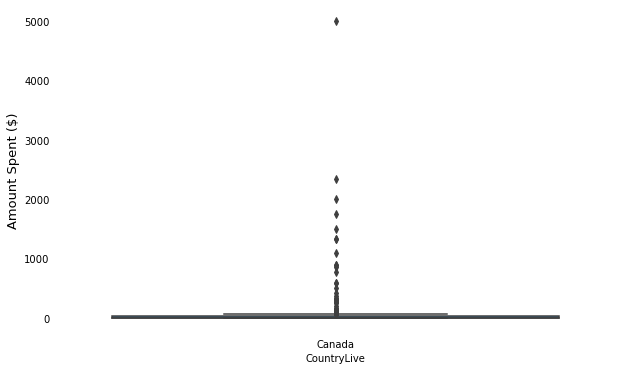

In [23]:
## Let's take a look at one of the countries closer 
cana = top4[top4['CountryLive'] == 'Canada']

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='CountryLive', y='SpentPerMonth', data=cana)
for location in ['left', 'right', 'top', 'bottom']:
     ax.spines[location].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_ylabel('Amount Spent ($)', size=13)
plt.show()

### Findings:
As you can see above there are extreme outliners in each distribution which overestimate the mean for each country. Let's find the outliners and remove the most extreme ones to balance our mean.

In [24]:
## Function to return list of outliners for a given country
def outliners(country):
    upper_quartile = top4.loc[top4['CountryLive'] == country, 'SpentPerMonth'].describe()['75%']
    lower_quartile = top4.loc[top4['CountryLive'] == country, 'SpentPerMonth'].describe()['25%']
    iqr = upper_quartile - lower_quartile
    
    upper_limit =  upper_quartile + iqr*1.5
    lower_limit = lower_quartile - iqr*1.5
    
    upper_outliners = []
    for i in sorted(top4.loc[top4['CountryLive'] == country, 'SpentPerMonth']):
        if i > upper_limit:
            upper_outliners.append(i)
    
    lower_outliners = []            ## we don't need the lower outliners since there are none for each country
    for i in sorted(top4.loc[top4['CountryLive'] == country, 'SpentPerMonth']):
        if i < lower_limit:
            lower_outliners.append(i)
        
    return upper_outliners          ## lets' return only upper_outliners 

In [25]:
## Let's look at 15 highest outliners in students' monthly expenditure in US
## Order goes descending (extreme outliners at the top)
pd.Series(outliners('United States of America')).sort_values(ascending=False).head(15)

447    80000.000000
446    50000.000000
445    16666.666667
443    15000.000000
444    15000.000000
442    14000.000000
441    12500.000000
440    10833.333333
439     9000.000000
438     8000.000000
437     8000.000000
436     6666.666667
435     6500.000000
434     5666.666667
433     5333.333333
dtype: float64

In [26]:
## Let's look at 10 highest in students' monthly expenditure in UK
## Order goes descending (extreme outliners at the top)
pd.Series(outliners('United Kingdom')).sort_values(ascending=False).head(10)

44    1400.000000
43    1250.000000
42    1200.000000
41    1000.000000
40     936.750000
39     357.142857
38     333.333333
37     307.692308
36     285.714286
35     250.000000
dtype: float64

In [27]:
## Let's look at 10 highest outliners in students' monthly expenditure in India
## Order goes descending (extreme outliners at the top)
pd.Series(outliners('India')).sort_values(ascending=False).head(10)

91    10000.000000
90     5000.000000
89     5000.000000
88     5000.000000
87     4166.666667
86     3333.333333
85     2000.000000
84     2000.000000
83     1666.666667
82     1500.000000
dtype: float64

In [28]:
## Let's look at 10 highest outliners in students' monthly expenditure in Canada
## Order goes descending (extreme outliners at the top)
pd.Series(outliners('Canada')).sort_values(ascending=False).head(10)

37    5000.000000
36    2337.166667
35    2000.000000
34    1750.000000
33    1500.000000
32    1333.333333
31    1333.333333
30    1100.000000
29     900.000000
28     888.888889
dtype: float64

#### From the above values I decided to set outliners for each country in the following ways:
* Anything higher than 2500 per month in India is an outliner
* Anything higher than 5000 per month in US is an outliner
* Anything higher than 3000 per month in Canada is an outliner
* I will not eliminate any outliners from UK since it looks normal

In [29]:
## Setting constraints as described above
clean_india = top4[(top4['CountryLive'] == 'India') & (top4['SpentPerMonth'] < 2500)]
clean_us = top4[(top4['CountryLive'] == 'United States of America') & (top4['SpentPerMonth'] < 5000)]
clean_canada = top4[(top4['CountryLive'] == 'Canada') & (top4['SpentPerMonth'] < 3000)]
clean_uk = top4[(top4['CountryLive'] == 'United Kingdom')]

In [30]:
## Let's combine each dataset 
clean = pd.concat([clean_india, clean_us, clean_canada, clean_uk], ignore_index=True)

In [31]:
## Let's take a look at the average expenditure by countries 
clean.groupby('CountryLive')['SpentPerMonth'].mean().sort_values(ascending=False)

CountryLive
United States of America    130.639017
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: SpentPerMonth, dtype: float64

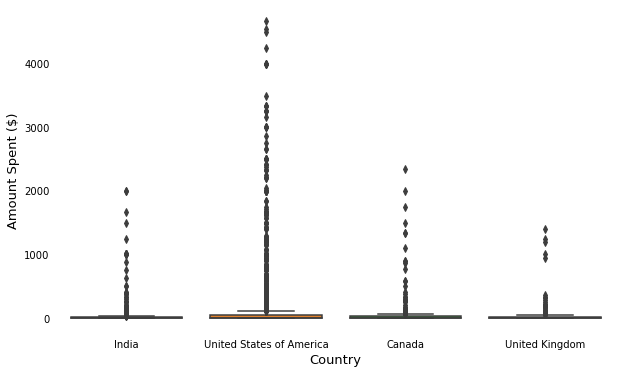

In [32]:
## Let's plot these figure to make a better sense of it
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='CountryLive', y='SpentPerMonth', data=clean)
for location in ['left', 'right', 'top', 'bottom']:
     ax.spines[location].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_xlabel('Country', size=13)
ax.set_ylabel('Amount Spent ($)', size=13)
plt.show()

## Findings:
As shown above, distribution for each country looks better than before. This made the mean look more balanced since we removed the most extreme outliners from our dataset. As you can see the distribution of monthly expenditure still has a lot of outliners which I won't remove. Because some people might actually be spending much more each month than most of the students.
Now, since our marketing department requested to find only two locations to make the advertisement, only two countries have to be chosen. Note that we want our students to be able to pay 59 dollars subscription fee per month. Any country where students spend under 59 dollars per month would not be the right fit for us. 

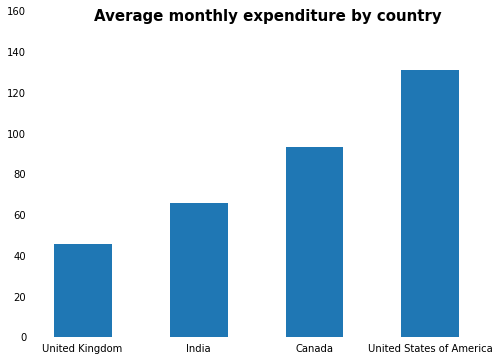

In [33]:
## Let's plot avarage monthly expenditure by country to find out which countries to choose 
true_mean = clean.groupby('CountryLive')['SpentPerMonth'].mean().sort_values().reset_index()

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(true_mean['CountryLive'], true_mean['SpentPerMonth'], width=0.5)

for location in ['left', 'right', 'top', 'bottom']:                 
     ax.spines[location].set_visible(False)                             
ax.set_ylim(top=160)                                      
ax.tick_params(bottom=False, left=False)                           
ax.text(x=0.1, y=155, s='Average monthly expenditure by country', size=15, weight='bold')        

plt.show()

## Analysis :

From the above bar graph, we can see that United Kingdom is not the right market for us. Because students in UK spend less than 59 dollar per month for e-learning. Now we have the following countries to choose from:

* US - Average of 130 dollars per month for e-learning
* Canada - Average of 93 dollars per month for e-learning
* India - Average of 65 dollars per month for e-learning

US is definitely the right candidate for marketing. Thus, we are left with Canada and India to choose from.
One way to go with would be to find the number of potential customers for both of the coutries. Whichever country has the highest number of potential customers - wins. By potential customer, it is implied that students in that country are willing to spend at least 59 dollars for monthly subscription.

In [34]:
## Let's count the number of potential customer in India
clean.loc[(clean['CountryLive'] == 'India') & (clean['SpentPerMonth'] >= 59), ['SpentPerMonth']].count()

SpentPerMonth    69
dtype: int64

In [35]:
## Let's count the number of potential customer in Canada
clean.loc[(clean['CountryLive'] == 'Canada') & (clean['SpentPerMonth'] >= 59), ['SpentPerMonth']].count()

SpentPerMonth    39
dtype: int64

## Conclusion :

As you can see above, India has more potential students to pay at least 59 dollars per month for subscription. Therefore, we are going to choose India as the second market to do our advertisement.

#### 1) USA
#### 2) India